In [1]:
from fastai.vision import *

In [2]:
mnist = untar_data(URLs.MNIST_TINY, dest='/mnt/6TB/Data/ML_Data/fastai/')
tfms = get_transforms(do_flip=False)

In [3]:
data = (ImageList.from_folder(mnist)
        .split_by_folder()          
        .label_from_folder()
        .add_test_folder('test')
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats)) 

In [5]:
learn = cnn_learner(data, models.resnet18)

In [6]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


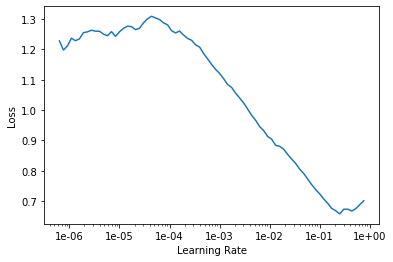

In [7]:
learn.recorder.plot()

In [ ]:
lr = 1e-2

In [ ]:
learn.fit_one_cycle(1, slice(lr))

In [ ]:
learn.save('resnet_18')